### Performing statistical analysis and applying scaling, Encoding, Outlier removal techniques on Survey Dataset

In [218]:
import pandas as pd
survey=pd.read_csv('https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv',parse_dates=True)
survey.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [121]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


In [123]:
survey.dtypes

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object

In [126]:
# Create subset of only the numeric columns
survey[['ConvertedSalary','StackOverflowJobsRecommend','Age','Years Experience']]

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
0,NaN,NaN,21,13
1,70841.0,7.0,38,9
2,NaN,8.0,45,11
3,21426.0,NaN,46,12
4,41671.0,8.0,39,7
...,...,...,...,...
994,NaN,NaN,45,10
995,58746.0,8.0,27,16
996,55000.0,NaN,54,16
997,NaN,NaN,23,9


In [125]:
survey.select_dtypes(include=['int64','float64'])

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
0,NaN,NaN,21,13
1,70841.0,7.0,38,9
2,NaN,8.0,45,11
3,21426.0,NaN,46,12
4,41671.0,8.0,39,7
...,...,...,...,...
994,NaN,NaN,45,10
995,58746.0,8.0,27,16
996,55000.0,NaN,54,16
997,NaN,NaN,23,9


In [127]:
# Convert the Country column to a one hot encoded Data Frame
survey['Country'].value_counts()

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Ukraine           9
Ireland           5
Name: Country, dtype: int64

In [129]:
survey_country_onehot=pd.get_dummies(survey,columns=['Country'])
survey_country_onehot.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,Country_France,Country_India,Country_Ireland,Country_Russia,Country_South Africa,Country_Spain,Country_Sweeden,Country_UK,Country_USA,Country_Ukraine
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,0,0,1,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,0,0,1,0,0,0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,8.0,Git,45,11,NaN,NaN,0,0,0,0,0,0,1,0,0,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,0,0,1,0,0,0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,8.0,Git,39,7,Male,"£41,671.00",0,0,0,0,0,0,0,1,0,0


In [133]:
# Create dummy variables for the Country column
# Convert the Country column to dummy encoded Data Frame
survey_country_dummy=pd.get_dummies(survey,columns=['Country'],drop_first=True)
survey_country_dummy.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,Country_India,Country_Ireland,Country_Russia,Country_South Africa,Country_Spain,Country_Sweeden,Country_UK,Country_USA,Country_Ukraine
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,0,1,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,0,1,0,0,0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,8.0,Git,45,11,NaN,NaN,0,0,0,0,0,1,0,0,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,0,1,0,0,0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,8.0,Git,39,7,Male,"£41,671.00",0,0,0,0,0,0,1,0,0


In [137]:
# Create a series out of the Country column
survey['Country']
# Get the counts of each category
survey['Country'].value_counts()

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Ukraine           9
Ireland           5
Name: Country, dtype: int64

In [161]:
# Create a mask (creating a group or combining into a group) for only categories that occur less than 100 times in Country column
mask=survey['Country'].isin(survey['Country'].value_counts()[survey['Country'].value_counts()<100].index)
mask
# Print the top 5 rows in the mask series
mask

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: Country, Length: 999, dtype: bool

In [157]:
# Label all other categories as Other
survey['Country'][mask]='Others'
survey['Country'].value_counts()

C:\Users\v-ankona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Others          301
South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Name: Country, dtype: int64

In [162]:
#Binarizing columns
## Create the Paid_Job column filled with zeros
survey['Paid_Job']=0

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,Paid_Job
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00",0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00",0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,Others,8.0,Git,39,7,Male,"£41,671.00",0


In [165]:
# Replace all the Paid_Job values with 1 where ConvertedSalary is > 0 else 0 if < 0
survey.loc[survey['ConvertedSalary']>0,'Paid_Job']=1
# Print the first five rows of the columns
survey.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,Paid_Job
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00",1
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00",1
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,Others,8.0,Git,39,7,Male,"£41,671.00",1


In [167]:
#Binning Values
# Bin the continuous variable ConvertedSalary into 5 bins
survey['ConvertedSalary_binned']=pd.cut(survey['ConvertedSalary'],bins=[0,20000,40000,60000,80000,100000])
# Print the first 5 rows of the equal_binned column
survey[['ConvertedSalary','ConvertedSalary_binned']]

,ConvertedSalary,ConvertedSalary_binned
0,NaN,NaN
1,70841.0,"(60000.0, 80000.0]"
2,NaN,NaN
3,21426.0,"(20000.0, 40000.0]"
4,41671.0,"(40000.0, 60000.0]"
...,...,...
994,NaN,NaN
995,58746.0,"(40000.0, 60000.0]"
996,55000.0,"(40000.0, 60000.0]"
997,NaN,NaN


In [168]:
#Assigning lables to Bins
survey['ConvertedSalary_binned']=pd.cut(survey['ConvertedSalary'],bins=[0,20000,40000,60000,80000,100000],labels=['Very Low','Low','Medium','High','Very High'])
survey[['ConvertedSalary','ConvertedSalary_binned']]

,ConvertedSalary,ConvertedSalary_binned
0,NaN,NaN
1,70841.0,High
2,NaN,NaN
3,21426.0,Low
4,41671.0,Medium
...,...,...
994,NaN,NaN
995,58746.0,Medium
996,55000.0,Medium
997,NaN,NaN


In [169]:
# Subset Age and Gender columns of the DataFrame
survey_Age_Gender=survey[['Age','Gender']]

# Print the number of non-missing values
survey_Age_Gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     999 non-null    int64 
 1   Gender  693 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [175]:
#Finding Missing Values
# Print the locations of the missing values(nulls)
survey_Age_Gender.isna()

,Age,Gender
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False
...,...,...
994,False,False
995,False,False
996,False,False
997,False,True


In [171]:
# Print the locations of the non-missing values (Not null)
survey_Age_Gender.notnull()

,Age,Gender
0,True,True
1,True,True
2,True,False
3,True,True
4,True,True
...,...,...
994,True,True
995,True,True
996,True,True
997,True,False


In [179]:
# Print the number of rows and columns
survey.shape

(999, 13)

In [181]:
# Create a new DataFrame dropping all incomplete rows
survey_dropnull_row=survey.dropna(how='any')
# Print the shape of the new DataFrame
survey_dropnull_row.shape

(205, 13)

In [192]:
# Create a new DataFrame dropping all incomplete columns
survey_dropnull_col=survey.dropna(how='any',axis=1)
# Print the shape of the new DataFrame
survey_dropnull_col.shape
survey_dropnull_col

pandas.core.frame.DataFrame

In [183]:
# Drop all rows where Gender is missing
survey_dropna_gender=survey.dropna(subset=['Gender'])
# Print the shape of the new DataFrame
survey_dropna_gender.shape

(693, 13)

In [186]:
#Replacing missing values
# Print the count of occurrences in Gender column
survey['Gender'].value_counts()

Male                                                                         632
Female                                                                        53
Transgender                                                                    2
Female;Male                                                                    2
Non-binary. genderqueer. or gender non-conforming                              1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Female;Transgender                                                             1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Name: Gender, dtype: int64

In [193]:
# Replace/filling missing values in Gender column with Static value 'Not Given'
survey['Gender'].fillna(value='Not Given',inplace=True)
# Print the count of each value
survey['Gender'].value_counts()

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Transgender                                                                    2
Female;Male                                                                    2
Non-binary. genderqueer. or gender non-conforming                              1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Female;Transgender                                                             1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Name: Gender, dtype: int64

In [196]:
#Filling continuous missing values
# Print the first five rows of StackOverflowJobsRecommend column
survey['StackOverflowJobsRecommend'].head()

0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64

In [209]:
# Fill missing values with the mean
import numpy as np
survey.fillna(survey['StackOverflowJobsRecommend'].mean(),inplace=True)

In [211]:
round(survey['StackOverflowJobsRecommend']).head()

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64

In [226]:
#Dealing with stray characters (I)
# Remove the commas in the column
survey['RawSalary']=survey['RawSalary'].str.replace(",",'')
survey['RawSalary']=survey['RawSalary'].str.replace('$','')
survey['RawSalary']=survey['RawSalary'].str.replace("£",'')
survey['RawSalary']

0             NaN
1        70841.00
2             NaN
3        21426.00
4        41671.00
          ...    
994           NaN
995      58746.00
996      55000.00
997           NaN
998    1000000.00
Name: RawSalary, Length: 999, dtype: object

In [250]:
# Attempt to convert the column to numeric values
survey['RawSalary']=pd.to_numeric(survey['RawSalary'],errors='coerce')
survey['RawSalary']
# Find the indexes of missing values
survey['RawSalary'][survey['RawSalary'].isna()]

0     NaN
2     NaN
6     NaN
8     NaN
11    NaN
       ..
989   NaN
990   NaN
992   NaN
994   NaN
997   NaN
Name: RawSalary, Length: 334, dtype: float64

In [253]:
survey['RawSalary']=survey['RawSalary'].astype('float64')
survey['RawSalary']

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64

In [255]:
# Use method chaining
survey['RawSalary'] = survey['RawSalary'].astype("str")\
                              .str.replace(",","")\
                              .str.replace('$', '')\
                              .str.replace('£', '')\
                              .astype("float")
survey['RawSalary']

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F00038BB48>,
      dtype=object)

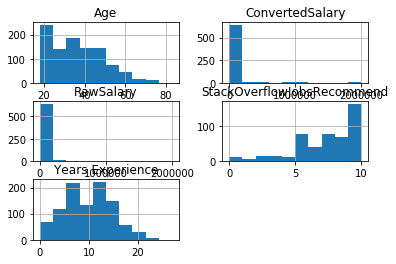

In [256]:
#Creating plot on entire DF.
survey.hist()

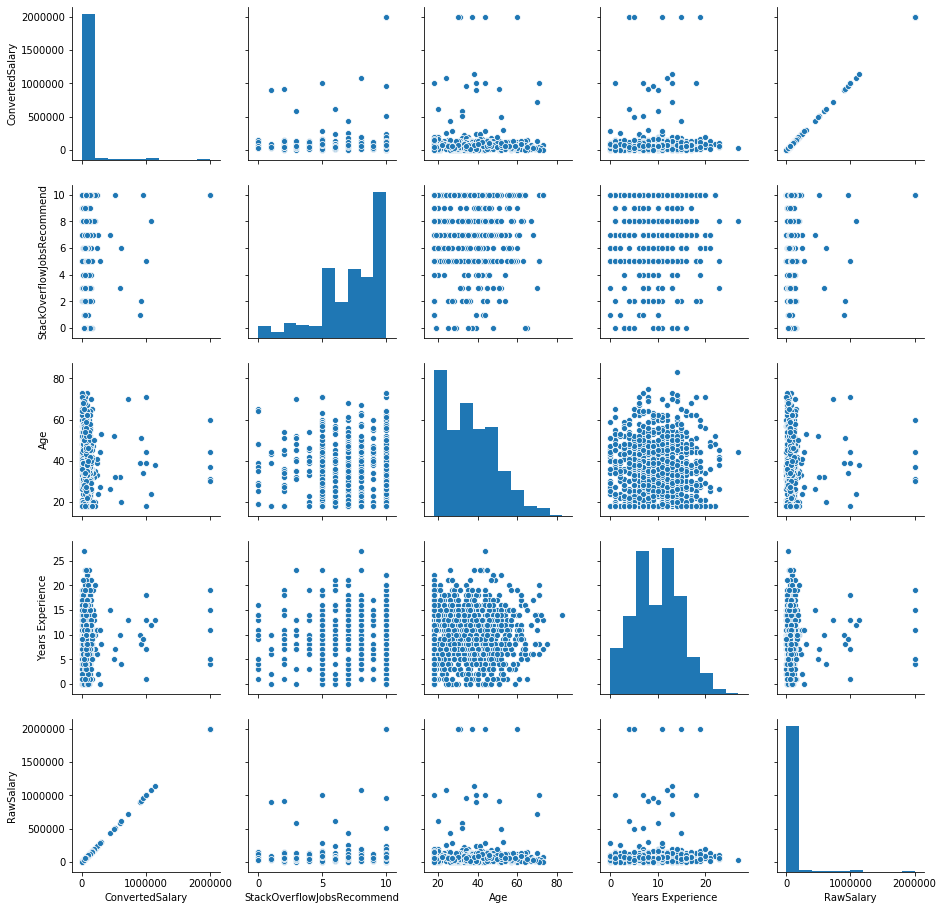

In [257]:
import seaborn as sns
sns.pairplot(survey)

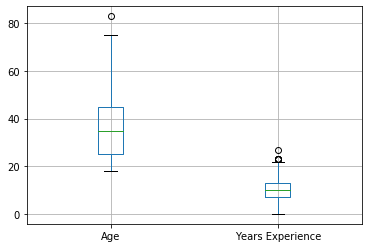

In [261]:
# Create a boxplot of two columns
survey[['Age','Years Experience']].boxplot()

In [262]:
survey.describe()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience,RawSalary
count,6.650000e+02,487.000000,999.000000,999.000000,6.650000e+02
mean,9.256517e+04,7.061602,36.003003,9.961962,9.256517e+04
std,2.091344e+05,2.621591,13.255127,4.878129,2.091344e+05
min,0.000000e+00,0.000000,18.000000,0.000000,0.000000e+00
25%,2.755000e+04,5.000000,25.000000,7.000000,2.755000e+04
50%,5.556200e+04,7.000000,35.000000,10.000000,5.556200e+04
75%,8.823800e+04,10.000000,45.000000,13.000000,8.823800e+04
max,2.000000e+06,10.000000,83.000000,27.000000,2.000000e+06


In [268]:
#Normalization means Scaling using MinMaxScalar
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
Age_scale=MinMaxScaler()
# Fit MM_scaler to the data
Age_scale.fit(survey[['Age']])
# Transform the data using the fitted scaler
survey['Age_Scaled']=Age_scale.transform(survey[['Age']])
# Compare the origional and transformed column
survey[['Age','Age_Scaled']]

,Age,Age_Scaled
0,21,0.046154
1,38,0.307692
2,45,0.415385
3,46,0.430769
4,39,0.323077
...,...,...
994,45,0.415385
995,27,0.138462
996,54,0.553846
997,23,0.076923


In [270]:
#Standardization means scaling using StandardScalar
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
# Instantiate StandardScaler
Age_Standard_Scale=StandardScaler()
# Fit SS_scaler to the data
Age_Standard_Scale.fit(survey[["Age"]])
# Transform the data using the fitted scaler
survey['Age_Scaled_Standard']=Age_Standard_Scale.transform(survey[["Age"]])
# Compare the origional and transformed column
survey[['Age','Age_Scaled_Standard','Age_Scaled']]

,Age,Age_Scaled_Standard,Age_Scaled
0,21,-1.132431,0.046154
1,38,0.150734,0.307692
2,45,0.679096,0.415385
3,46,0.754576,0.430769
4,39,0.226214,0.323077
...,...,...,...
994,45,0.679096,0.415385
995,27,-0.679549,0.138462
996,54,1.358419,0.553846
997,23,-0.981470,0.076923


C:\Users\v-ankona\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\v-ankona\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


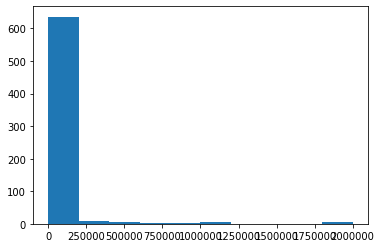

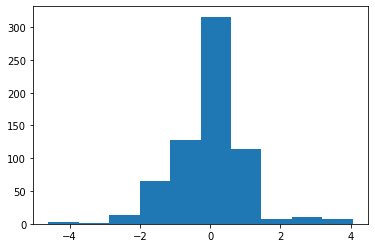

,Age,Age_Scaled,Age_Scaled_Standard,Age_Scaled_PT
0,21,0.046154,-1.132431,NaN
1,38,0.307692,0.150734,0.312939
2,45,0.415385,0.679096,NaN
3,46,0.430769,0.754576,-0.652182
4,39,0.323077,0.226214,-0.135589


In [304]:
#LogTransformation means scaling using PowerTransformer
# Import PowerTransformer
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(survey['ConvertedSalary'])
plt.show()
plt.hist(survey['Age_Scaled_PT'])
plt.show()
from sklearn.preprocessing import PowerTransformer
# Instantiate PowerTransformer
Age_PT=PowerTransformer()
# Train the transform on the data
Age_PT.fit(survey[['ConvertedSalary']])
# Apply the power transform to the data
survey['Age_Scaled_PT']=Age_PT.transform(survey[['ConvertedSalary']])
# Plot the data before and after the transformation
survey[['Age','Age_Scaled','Age_Scaled_Standard','Age_Scaled_PT']].head()

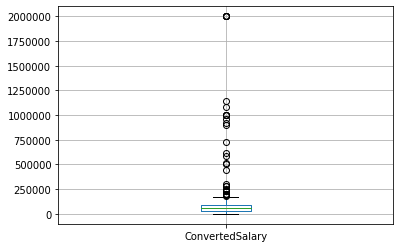

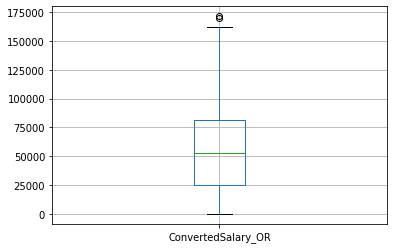

In [311]:
#Percentage/Quantile based outlier removal
# Find the 95th quantile
cutoff=survey['ConvertedSalary'].quantile(0.95)
# Trim the outliers
survey['ConvertedSalary_OR']=survey['ConvertedSalary'][survey['ConvertedSalary']<cutoff]
# The original histogram
survey[['ConvertedSalary']].boxplot()
plt.show()
# The trimmed histogram
survey[['ConvertedSalary_OR']].boxplot()
plt.show()

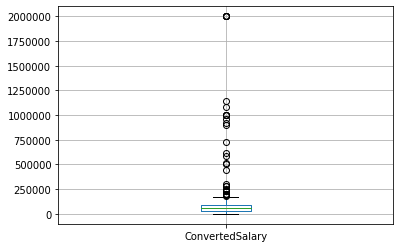

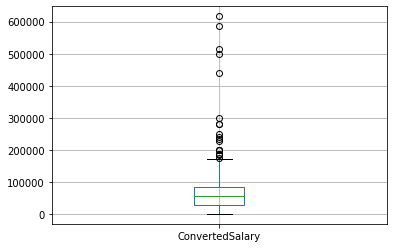

In [314]:
#Statistical outlier removal
# Find the mean and standard dev
mean=survey['ConvertedSalary'].mean()
std=survey['ConvertedSalary'].std()
# Calculate the cutoff
cutoff=3*std
lower,upper=mean-cutoff,mean+cutoff
# Trim the outliers
trimmed_df=survey[(survey['ConvertedSalary']>lower)&(survey['ConvertedSalary']<upper)]
# The trimmed box plot
survey[['ConvertedSalary']].boxplot()
plt.show()
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

In [317]:
#Train and testing transformations
survey.shape
train_survey=survey.iloc[:700,:]
test_survey=survey.iloc[700:,:]

In [320]:
#Applying Scaling on Train data and Transforming Test Data
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
# Apply a standard scaler to the data
Age_SS=StandardScaler()
# Fit the standard scaler to the data
Age_SS.fit(train_survey[['Age']])
# Transform the test data using the fitted scaler
test_survey['Age_Scaled_SS']=Age_SS.transform(test_survey[['Age']])
test_survey[['Age','Age_Scaled_SS']]

C:\Users\v-ankona\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Age_Scaled_SS
700,35,-0.069265
701,18,-1.343218
702,47,0.829997
703,57,1.579381
704,41,0.380366
...,...,...
994,45,0.680120
995,27,-0.668772
996,54,1.354566
997,23,-0.968526


In [332]:
#Train and testing transformations
#Applying Outlier Method on Train data and removing outliers from Test Data
train_survey=survey.iloc[:700,:]
test_survey=survey.iloc[700:,:]
mean=train_survey['ConvertedSalary'].mean()
std=train_survey['ConvertedSalary'].std()
cutoff=std*3
lower,upper=mean-cutoff,mean+cutoff
trimmed_df=test_survey[(test_survey['ConvertedSalary']>lower)&(test_survey['ConvertedSalary']<upper)]
print(trimmed_df['ConvertedSalary'])
print(test_survey['ConvertedSalary'])

700     36716.0
701    200000.0
703     10476.0
707     42672.0
708     23614.0
         ...   
988     50448.0
991     55562.0
993     30000.0
995     58746.0
996     55000.0
Name: ConvertedSalary, Length: 185, dtype: float64
700      36716.0
701     200000.0
702          NaN
703      10476.0
704          NaN
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: ConvertedSalary, Length: 299, dtype: float64
